In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Dimention reduction

## Load data

In [2]:
class_name = 'Cultivars'

feature_cols = [
        'Alcohol',
        'Malic_acid',
        'Ash',
        'Alcalinity_of_ash',
        'Magnesium',
        'Total_phenols',
        'Flavanoids',
        'Nonflavanoid_phenols',
        'Proanthocyanins',
        'Color_intensity',
        'Hue',
        'OD280/OD315_of_diluted_wines',
        'Proline'
    ]

cols = feature_cols.copy()
cols.insert(0, class_name)

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', 
                 header=None, names=cols)

features = df.drop(class_name, axis=1)
target = df[class_name]

df.head()

,Cultivars,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## PCA

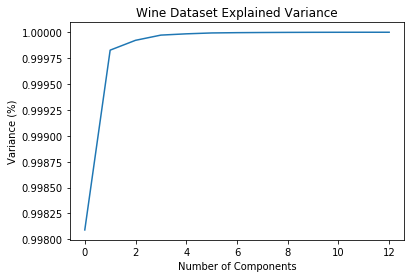

In [3]:
from sklearn.decomposition import PCA

#Fitting the PCA algorithm with our Data
pca = PCA().fit(features)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Wine Dataset Explained Variance')
plt.show()

In [4]:
def zip_features_and_class(features_, class_):
    df_ = pd.DataFrame({'x': features_[:, 0], 'y': features_[:, 1]})
    result = pd.concat([df_, class_], axis=1, sort=False)
    return result

def plot_reduced_dataset(df_):
    groups = df_.groupby(class_name)

    # Plot
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 7)
    ax.margins(0.05)
    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms='7', label=name)
    ax.legend()
    plt.show()

In [5]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)
res_pca = zip_features_and_class(reduced_features, target)
res_pca

,x,y,Cultivars
0,318.562979,21.492131,1
1,303.097420,-5.364718,1
2,438.061133,-6.537309,1
3,733.240139,0.192729,1
4,-11.571428,18.489995,1
...,...,...,...
173,-6.980211,-4.541137,3
174,3.131605,2.335191,3
175,88.458074,18.776285,3
176,93.456242,18.670819,3


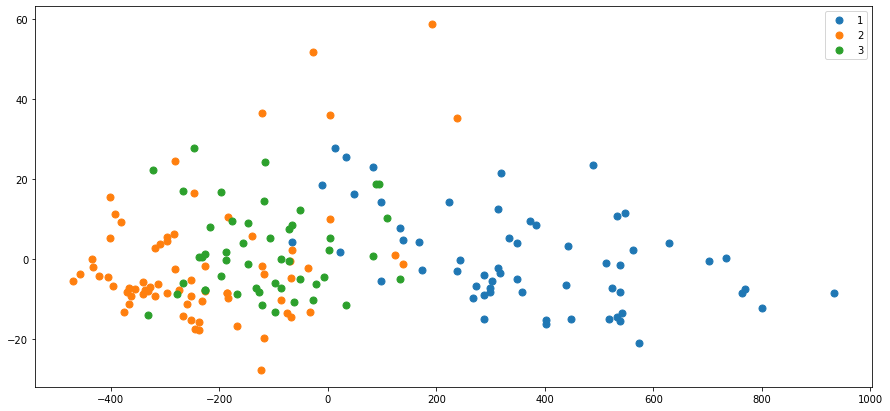

In [6]:
plot_reduced_dataset(res_pca)

## TSNE

In [7]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
reduced_features = tsne.fit_transform(features)
res_tsne = zip_features_and_class(reduced_features, target)
res_tsne

,x,y,Cultivars
0,-9.564613,-6.289399,1
1,-9.180284,-6.235395,1
2,-11.390732,-7.600729,1
3,-13.920623,-8.967807,1
4,-1.861809,-2.208588,1
...,...,...,...
173,-1.635896,-2.561260,3
174,-2.038253,-2.737238,3
175,-4.364051,-3.972490,3
176,-4.632860,-3.826331,3


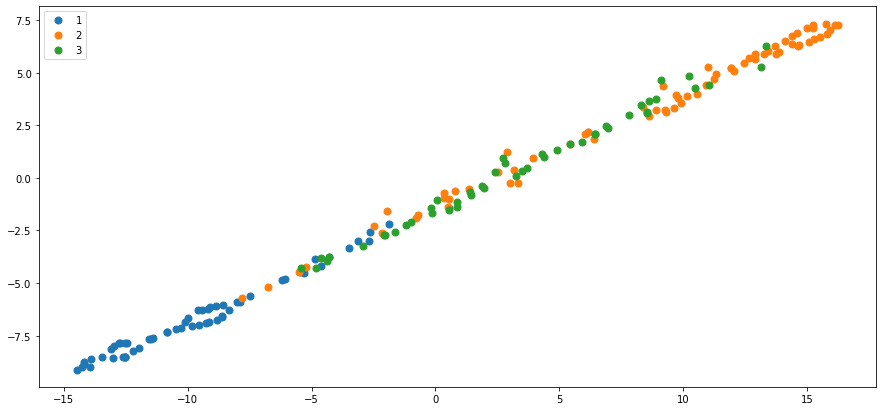

In [8]:
plot_reduced_dataset(res_tsne)

# Text processing

In [9]:
from sklearn.datasets import fetch_20newsgroups
train_all = fetch_20newsgroups(subset='train')
train_all.target_names

categories = ['sci.crypt', 'sci.space', 'comp.windows.x']
data_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [10]:
print("\n".join(data_train.data[0].split("\n")[:3]))
print()
print(data_train.target_names[data_train.target[0]])

From: pat@rwing.UUCP (Pat Myrto)
Subject: Re: Once tapped, your code is no good any more.
Article-I.D.: rwing.2091

sci.crypt


In [11]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(lowercase=True, stop_words='english')
X_train_counts = count_vect.fit_transform(data_train.data)
X_train_counts.shape

(1781, 32881)

In [12]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(1781, 32881)

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def report(actual, predicted):
    print('Accuracy: {0}\n'.format(accuracy_score(actual, predicted)))
    print('Confusion matrix:\n\n {0}\n'.format(confusion_matrix(actual, predicted)))
    print('Classification report:\n\n {0}'.format(classification_report(actual, predicted)))

In [14]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train_tfidf, data_train.target)

/home/stepan/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

docs_test = twenty_test.data
docs_test = count_vect.transform(docs_test)
docs_test = tfidf_transformer.transform(docs_test)
print(docs_test.shape)
print()

predicted = rfc.predict(docs_test)
report(twenty_test.target, predicted)

(1185, 32881)

Accuracy: 0.8962025316455696

Confusion matrix:

 [[372   3  20]
 [ 37 348  11]
 [ 41  11 342]]

Classification report:

               precision    recall  f1-score   support

           0       0.83      0.94      0.88       395
           1       0.96      0.88      0.92       396
           2       0.92      0.87      0.89       394

    accuracy                           0.90      1185
   macro avg       0.90      0.90      0.90      1185
weighted avg       0.90      0.90      0.90      1185



In [16]:
import multidict as multidict

import os
import re
from PIL import Image
from os import path
from wordcloud import WordCloud


def getFrequencyDictForText(texts):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}

    # making dict for counting frequencies
    for t in texts:
        for text in t.split(" "):
            if re.match("a|the|an|the|to|in|for|of|or|by|with|is|on|that|be", text):
                continue
            val = tmpDict.get(text, 0)
            tmpDict[text.lower()] = val + 1
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict
        

def makeImage(text):
    wc = WordCloud(background_color="white", max_words=1000)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.figure(figsize=(15,15))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

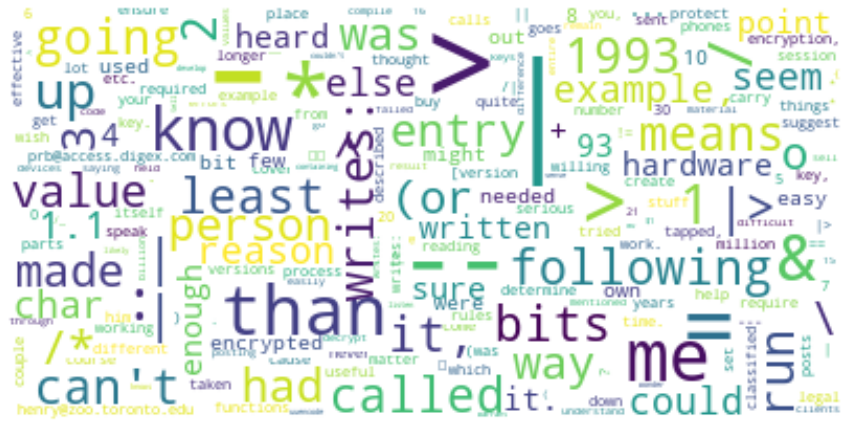

In [17]:
makeImage(getFrequencyDictForText(data_train.data))

In [18]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD()
X_train_svd = svd.fit_transform(X_train_tfidf)
X_train_svd

array([[ 0.14693684, -0.01025766],
       [ 0.24760619,  0.21610919],
       [ 0.08119445, -0.02770213],
       ...,
       [ 0.20882581,  0.15446647],
       [ 0.08860045, -0.00703845],
       [ 0.21699865, -0.164426  ]])

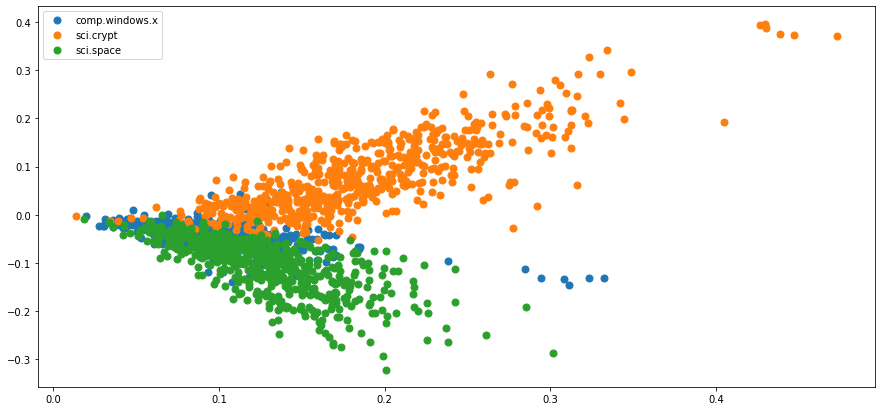

In [19]:
target_named = [data_train.target_names[target] for target in data_train.target]

text_df = zip_features_and_class(X_train_svd, pd.DataFrame({'topic':target_named}))

groups = text_df.groupby('topic')

# Plot
fig, ax = plt.subplots()
fig.set_size_inches(15, 7)
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms='7', label=name)
ax.legend()
plt.show()

In [26]:
def plot_clusters_with_centers(data, pred, centers):
    plt.figure(figsize=(15,7))
    plt.scatter(data[:, 0], data[:, 1], c=pred, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

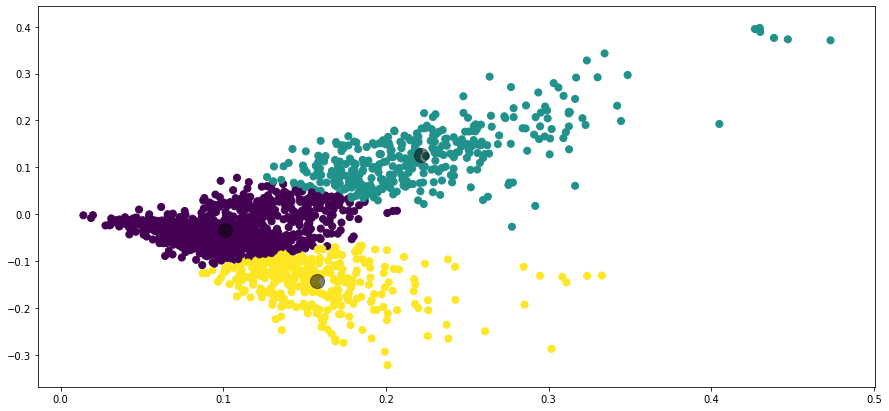

In [32]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

kmeans.fit(X_train_svd)
y_kmeans = kmeans.predict(X_train_svd)

plot_clusters_with_centers(X_train_svd, y_kmeans, kmeans.cluster_centers_)

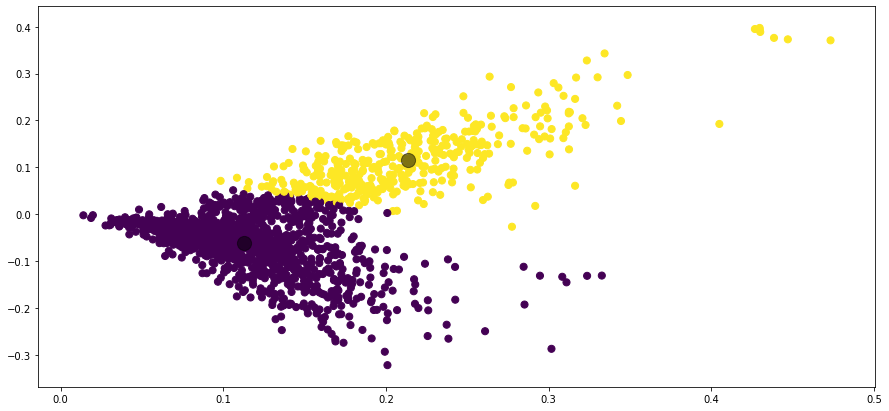

In [30]:
kmeans = KMeans(n_clusters=2)

kmeans.fit(X_train_svd)
y_kmeans = kmeans.predict(X_train_svd)

plot_clusters_with_centers(X_train_svd, y_kmeans, kmeans.cluster_centers_)

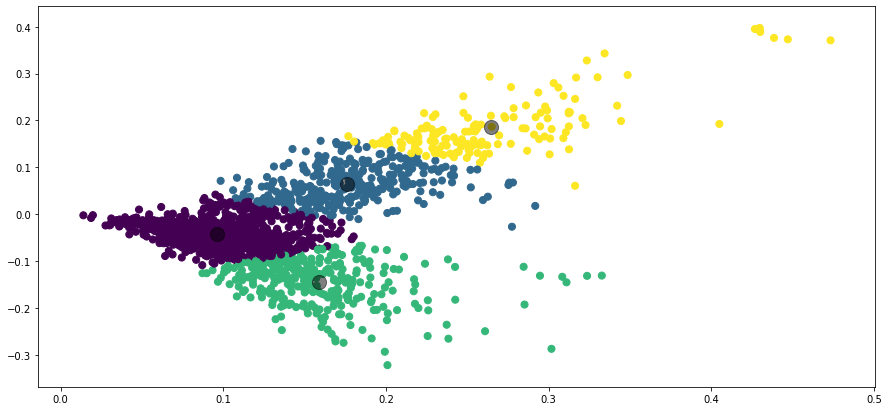

In [31]:
kmeans = KMeans(n_clusters=4)

kmeans.fit(X_train_svd)
y_kmeans = kmeans.predict(X_train_svd)

plot_clusters_with_centers(X_train_svd, y_kmeans, kmeans.cluster_centers_)